# Which one is a better plan?

You work as an analyst for the telecom operator Megaline. The company offers its clients two prepaid plans, Surf and Ultimate. The commercial department wants to know which of the plans brings in more revenue in order to adjust the advertising budget.

You are going to carry out a preliminary analysis of the plans based on a relatively small client selection. You'll have the data on 500 Megaline clients: who the clients are, where they're from, which plan they use, and the number of calls they made and text messages they sent in 2018. Your job is to analyze the clients' behavior and determine which prepaid plan brings in more revenue.

# Initialization

We begin with loading libraries required for the project.

In [1]:
# Loading all the libraries
import pandas as pd
import scipy.stats as stats
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


# Load data

Let's load the project data and have a look at the general information.

In [2]:
# Load the data files into different DataFrames
try:
    calls = pd.read_csv('megaline_calls.csv')
except:
    calls = pd.read_csv('/datasets/megaline_calls.csv')

try:
    internet = pd.read_csv('megaline_internet.csv')
except:
    internet = pd.read_csv('/datasets/megaline_internet.csv')    

try:
    plans = pd.read_csv('megaline_plans.csv')
except:
    plans = pd.read_csv('/datasets/megaline_plans.csv')
    
try:
    messages = pd.read_csv('megaline_messages.csv')
except:
    messages = pd.read_csv('/datasets/megaline_messages.csv')
    
try:
    users = pd.read_csv('megaline_users.csv')
except:
    users = pd.read_csv('/datasets/megaline_users.csv')    


# Prepare the data

## Plans

In [3]:
# Print the general/summary information about the plans' DataFrame
plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Print a sample of data for plans
plans



,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


There are only 2 rows of data describing two prepaid plans, Surf and Ultimate. All the columns are ok: datatypes are correct, no errors, no missing values.

## Users

In [5]:
# Print the general/summary information about the users' DataFrame
users.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [6]:
# Print a sample of data for users

users.head(2)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN


Users table contains general information about Megaline clients: who they are, their age, where they're from, which plan they use and the dates they registered and stopped using the service.

In [7]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


The only numerical parameter - age - is ok, all values are adequate. Mean client's age is 45.5 years old. Values are integers as well as  user_ids.

Other parametes are qualitative. User's first_name and last_name are not important for our analysis, user_id is enough. City will be taken into account.

In [8]:
users.city.nunique()

73

In [9]:
users.city.value_counts()

New York-Newark-Jersey City, NY-NJ-PA MSA          80
Los Angeles-Long Beach-Anaheim, CA MSA             29
Dallas-Fort Worth-Arlington, TX MSA                21
Chicago-Naperville-Elgin, IL-IN-WI MSA             19
Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA    17
                                                   ..
Albany-Schenectady-Troy, NY MSA                     1
Jacksonville, FL MSA                                1
Cape Coral-Fort Myers, FL MSA                       1
Oxnard-Thousand Oaks-Ventura, CA MSA                1
Raleigh-Cary, NC MSA                                1
Name: city, Length: 73, dtype: int64

The majority of clients is from New York, then come Los Angeles and Dallas.

In [10]:
users.plan.value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

Megaline clients use surf plan 2 times more often than ultimate.

In [11]:
users.reg_date.nunique()

266

In [12]:
users.churn_date.value_counts(dropna=False)

NaN           466
2018-12-18      3
2018-12-31      2
2018-12-19      2
2018-11-14      2
2018-12-15      1
2018-09-01      1
2018-07-31      1
2018-10-22      1
2018-11-21      1
2018-11-29      1
2018-12-22      1
2018-12-10      1
2018-11-30      1
2018-09-07      1
2018-10-13      1
2018-12-12      1
2018-11-16      1
2018-08-19      1
2018-11-24      1
2018-09-17      1
2018-10-07      1
2018-12-30      1
2018-12-27      1
2018-11-11      1
2018-09-18      1
2018-10-03      1
2018-11-18      1
2018-08-16      1
2018-12-26      1
Name: churn_date, dtype: int64

Values in reg_date and churn_date columns are object type(info), but should be date_time type, because they are dates of registration and the end of using the service. Churn_date is given only for 34 clients, other values are missing.

Let's check duplicates in users.

In [13]:
 users.duplicated().sum()

0

No duplicates. 

**So,** Users table contains general information about 500 Megaline clients: id, name, age (18-75), where they're from (73 cities), their plan(surf/ultimate), dates they registered and stopped using the service. This last column - churn_date - has many missing values, that should be addressed. Dates in reg_date and churn_date are now object type, they should be changed to date_time type.

### Fix Data

First we fix data type in reg_date column.

In [14]:
users['reg_date']= pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['reg_date']

0     2018-12-24
1     2018-08-13
2     2018-10-21
3     2018-01-28
4     2018-05-23
         ...    
495   2018-09-04
496   2018-02-20
497   2018-12-10
498   2018-02-04
499   2018-05-06
Name: reg_date, Length: 500, dtype: datetime64[ns]


Then check unique values in churn_date column.

In [15]:
users['churn_date'].unique()

array([nan, '2018-12-18', '2018-11-16', '2018-09-07', '2018-12-30',
       '2018-10-07', '2018-12-31', '2018-11-24', '2018-11-11',
       '2018-12-12', '2018-11-14', '2018-12-27', '2018-11-29',
       '2018-12-22', '2018-11-30', '2018-10-13', '2018-07-31',
       '2018-12-15', '2018-12-19', '2018-10-03', '2018-10-22',
       '2018-08-16', '2018-12-26', '2018-09-01', '2018-11-21',
       '2018-08-19', '2018-12-10', '2018-09-17', '2018-11-18',
       '2018-09-18'], dtype=object)

Non-missing values are dates in the second half of 2018,  while clients with nan values continued using Surf or Ultimate plan up to the very end of 2018, when the data was gathered. So we may replace NaN with 2018-12-31.

In [16]:
users['churn_date']=users['churn_date'].fillna('2018-12-31')
users['churn_date']

0      2018-12-31
1      2018-12-31
2      2018-12-31
3      2018-12-31
4      2018-12-31
          ...    
495    2018-12-31
496    2018-12-31
497    2018-12-31
498    2018-12-31
499    2018-12-31
Name: churn_date, Length: 500, dtype: object

Now it's possible to change the values to date_time format.

In [17]:
users['churn_date']= pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['churn_date'].head()

0   2018-12-31
1   2018-12-31
2   2018-12-31
3   2018-12-31
4   2018-12-31
Name: churn_date, dtype: datetime64[ns]

In [18]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  500 non-null    datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


**Now the dataset is clean.**

For the further analysis we may often need information about user's plan. Let extract columns user_id and plan from users dataset and store them in a separate table.

In [19]:
user_id_plan = users[['user_id', 'plan']].copy()
user_id_plan

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


**Conclusion** Missing values in churn_date column were filled with 2018-12-31. Dates in reg_date and churn_date were changed to date_time format. 

## Calls

In [20]:
# Print the general/summary information about the calls' DataFrame

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [21]:
# Print a sample of data for calls
calls.head()


,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


There are 137735 rows for calls and 4 columns for call_id, user_id, date and duration. No missind values. Values in call_date column are object type, that should be changed to date_time format. There also can be duplicated rows. Let's check it. 

In [22]:
calls.query('user_id==1')

,id,user_id,call_date,duration


In [23]:
calls.duplicated().sum()

0

In [24]:
calls.user_id. nunique()

481

### Fix data

Values in 'call_date' column are changed to datetime format.

In [25]:
calls['call_date']=pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['call_date']

0        2018-12-27
1        2018-12-27
2        2018-12-27
3        2018-12-28
4        2018-12-30
            ...    
137730   2018-11-21
137731   2018-10-20
137732   2018-09-21
137733   2018-10-10
137734   2018-12-29
Name: call_date, Length: 137735, dtype: datetime64[ns]

We'll also need info about month:

In [26]:
calls['month']=calls['call_date'].dt.month
calls['month'].value_counts()

12    30614
11    24651
10    21064
9     16523
8     13590
7     11105
6      8221
5      5959
4      3442
3      1620
2       774
1       172
Name: month, dtype: int64

### Enrich data

Knowing that Megaline rounds seconds up to minutes (each individual call is rounded up: even if the call lasted just one second, it will be counted as one minute), add column with rounded call duration:

In [27]:
calls['duration_rd']=np.ceil(calls['duration'])
calls['duration_rd']

0          9.0
1         14.0
2         15.0
3          6.0
4          5.0
          ... 
137730     9.0
137731    11.0
137732     9.0
137733     1.0
137734    14.0
Name: duration_rd, Length: 137735, dtype: float64

Let's check values:

In [28]:
calls.duration_rd.value_counts()

0.0     26834
6.0      7848
5.0      7778
7.0      7769
8.0      7718
4.0      7434
9.0      7357
3.0      6942
10.0     6918
2.0      6446
11.0     6407
1.0      5795
12.0     5750
13.0     5070
14.0     4402
15.0     3889
16.0     3011
17.0     2461
18.0     1992
19.0     1604
20.0     1243
21.0      910
22.0      671
23.0      461
24.0      324
25.0      235
26.0      157
27.0      118
28.0       62
29.0       58
30.0       27
31.0       18
32.0       13
33.0        6
36.0        3
34.0        2
38.0        1
37.0        1
Name: duration_rd, dtype: int64

There are many 0s, but these 0-calls will also be treated as 1 sec calls and charged. So let's change 0 values in duration_rd column to 1 to count revenue more accutately:

In [29]:
calls[calls['duration_rd']==0]['duration_rd'] = 1
calls.duration_rd.value_counts()



/tmp/ipykernel_89/2941275769.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  calls[calls['duration_rd']==0]['duration_rd'] = 1


0.0     26834
6.0      7848
5.0      7778
7.0      7769
8.0      7718
4.0      7434
9.0      7357
3.0      6942
10.0     6918
2.0      6446
11.0     6407
1.0      5795
12.0     5750
13.0     5070
14.0     4402
15.0     3889
16.0     3011
17.0     2461
18.0     1992
19.0     1604
20.0     1243
21.0      910
22.0      671
23.0      461
24.0      324
25.0      235
26.0      157
27.0      118
28.0       62
29.0       58
30.0       27
31.0       18
32.0       13
33.0        6
36.0        3
34.0        2
38.0        1
37.0        1
Name: duration_rd, dtype: int64

In [30]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   id           137735 non-null  object        
 1   user_id      137735 non-null  int64         
 2   call_date    137735 non-null  datetime64[ns]
 3   duration     137735 non-null  float64       
 4   month        137735 non-null  int64         
 5   duration_rd  137735 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 6.3+ MB


**Conclusion** Now calls dataset has 6 columns, no missing or wierd values, all datatypes are correct.

## Messages

In [31]:
# Print the general/summary information about the messages' DataFrame

messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [32]:
# Print a sample of data for messages
messages.head()


,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26



Messages dataset carries information about text messages: who and when sent them. There are 76051 rows 3 columns of non-missing values.


In [33]:
messages.duplicated().sum()

0

In [34]:
messages.message_date.nunique()

351

Values in message_date column are object type, they need converting to datetime format.

### Fix data

In [35]:
messages['message_date']=pd.to_datetime(messages['message_date'], format='%Y-%m-%d')
messages['message_date']

0       2018-12-27
1       2018-12-31
2       2018-12-31
3       2018-12-27
4       2018-12-26
           ...    
76046   2018-12-24
76047   2018-12-24
76048   2018-12-31
76049   2018-12-24
76050   2018-12-23
Name: message_date, Length: 76051, dtype: datetime64[ns]

Now all values  in message_date column are ok.

### Enrich data

We'll need information about month when a message was sent, let's make a new column for it.

In [36]:
messages['month']=pd.to_datetime(messages['message_date']).dt.month
messages['month']

0        12
1        12
2        12
3        12
4        12
         ..
76046    12
76047    12
76048    12
76049    12
76050    12
Name: month, Length: 76051, dtype: int64

In [37]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
 3   month         76051 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 2.3+ MB


**Conclusion** Now messages dataset has 4 columns(months when message was sent are stored in addditional column), no duplicates, no missing values, all datatypes are ok. 

## Internet

In [38]:
# Print the general/summary information about the internet DataFrame
internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [39]:
# Print a sample of data for the internet traffic

internet.head()

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22


This dataset contains information about internet sessions: who, when and how many megabytes spent. 104825 rows 4 columns of non-missing values, all datatypes are correct except object type in session_date column.

### Fix data

Convert values in session_date column to datetime format.

In [40]:
internet.session_date =pd.to_datetime(internet.session_date, format = '%Y-%m-%d')
internet.session_date

0        2018-12-29
1        2018-12-31
2        2018-12-28
3        2018-12-26
4        2018-12-27
            ...    
104820   2018-10-20
104821   2018-12-30
104822   2018-09-22
104823   2018-12-07
104824   2018-12-24
Name: session_date, Length: 104825, dtype: datetime64[ns]

### Enrich data

Create a new column for month values:

In [41]:
internet['month']=pd.to_datetime(internet['session_date']).dt.month
internet['month']

0         12
1         12
2         12
3         12
4         12
          ..
104820    10
104821    12
104822     9
104823    12
104824    12
Name: month, Length: 104825, dtype: int64

In [42]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
 4   month         104825 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 4.0+ MB


**Conclusion** Now internet dataset is ready, no more issues left.

## Study plan conditions

In [43]:
# Print out the plan conditions and make sure they are clear for you
plans


,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Surf users are 2 times more numerous, they pay 3.5 times less monthly charge and have smaller package limites (20 times less messages, 6 times less minutes and 2 times less internet included), but pay more after exceeding limites than Ultimate users. To find which plan gives more revenue to Megaline we have to study core parameters.


## Aggregate data per user

Now, as the data is clean, we can aggregate data per user per period in order to have just one record per user per period. It should ease the further analysis a lot.

In [44]:
calls.head(3)

,id,user_id,call_date,duration,month,duration_rd
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0


In [45]:
# Calculate  number of calls made and call duration per each user per month and save the result in calls_m

calls_m=calls.groupby(['user_id', 'month']).agg({'id':'count', 'duration_rd':'sum'}).reset_index()
calls_m

,user_id,month,id,duration_rd
0,1000,12,16,124.0
1,1001,8,27,182.0
2,1001,9,49,315.0
3,1001,10,65,393.0
4,1001,11,64,426.0
...,...,...,...,...
2253,1498,12,39,339.0
2254,1499,9,41,346.0
2255,1499,10,53,385.0
2256,1499,11,45,308.0


In [46]:
# Calculate number of messages sent by each user per month and save the result in messages_m
messages_m=messages.groupby(['user_id','month']) ['id'].count().reset_index()
messages_m



,user_id,month,id
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


In [47]:
# Calculate total volume of internet traffic used by each user and save the result in internet_m
internet_m=internet.groupby(['user_id', 'month']) ['mb_used'].sum().reset_index()
internet_m

,user_id,month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


As Megaline charges monthly internet in gigabytes rounded up, let's add column witn gb:

In [48]:
internet_m['gb_m']=np.ceil(internet_m['mb_used']/1024).astype(int)
internet_m

,user_id,month,mb_used,gb_m
0,1000,12,1901.47,2
1,1001,8,6919.15,7
2,1001,9,13314.82,14
3,1001,10,22330.49,22
4,1001,11,18504.30,19
...,...,...,...,...
2272,1498,12,23137.69,23
2273,1499,9,12984.76,13
2274,1499,10,19492.43,20
2275,1499,11,16813.83,17


Now we put the aggregate data together into one DataFrame user_param so that one record in it would represent what a unique user consumed in a given month.

In [49]:
from functools import reduce
datas = [calls_m, messages_m,internet_m]
user_param=reduce(lambda left,right: pd.merge(left,right, on=['user_id','month'], how='outer'), datas).fillna(0)
user_param

,user_id,month,id_x,duration_rd,id_y,mb_used,gb_m
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,2.0
2290,1482,10,0.0,0.0,2.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


Rename columns to understand the values

In [50]:
user_param.columns = ['user_id','month','calls_m', 'calls_dur_m', 'messages_m', 'mb_m', 'gb_m']
user_param

,user_id,month,calls_m,calls_dur_m,messages_m,mb_m,gb_m
0,1000,12,16.0,124.0,11.0,1901.47,2.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0
2,1001,9,49.0,315.0,44.0,13314.82,14.0
3,1001,10,65.0,393.0,53.0,22330.49,22.0
4,1001,11,64.0,426.0,36.0,18504.30,19.0
...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0
2289,1361,5,0.0,0.0,2.0,1519.69,2.0
2290,1482,10,0.0,0.0,2.0,0.00,0.0
2291,1108,12,0.0,0.0,0.0,233.17,1.0


Let's add plan values to user_param dataset in a separate column:

In [51]:
user_param= pd.merge(left = user_param , right = user_id_plan, how='left',on=['user_id'])
user_param

,user_id,month,calls_m,calls_dur_m,messages_m,mb_m,gb_m,plan
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf
...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0,surf
2289,1361,5,0.0,0.0,2.0,1519.69,2.0,surf
2290,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate
2291,1108,12,0.0,0.0,0.0,233.17,1.0,ultimate


Now it's possible to calculate the monthly revenue from each user (subtract the free package limit from the total number of calls, text messages, and data; multiply the result by the calling plan value; add the monthly charge depending on the calling plan.

In [52]:
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [53]:
# Calculate the monthly revenue for each user
def calc_revenue(row):
    plan=row['plan']
    calls_dur_m=row['calls_dur_m']
    messages_m=row['messages_m']
    gb_m=row['gb_m'] 
    if plan == 'surf':
        revenue = 20
        if calls_dur_m - 500 <=0:
            revenue=revenue
        else:
            revenue+=(calls_dur_m- 500)*0.03
        if  messages_m -50 <=0:
            revenue=revenue
        else:
            revenue+=(messages_m - 50)*0.03
        if gb_m - 15 <= 0:
            revenue=revenue
        else:
            revenue +=(gb_m - 15)*10
    if plan == 'ultimate':
        revenue = 70
        if calls_dur_m -3000 <=0:
            revenue=revenue
        else:
            revenue+=(calls_dur_m - 3000)*0.01
        if   messages_m -1000 <=0:
            revenue=revenue
        else:
            revenue+=(messages_m - 1000)*0.01
        if gb_m - 30 <= 0:
            revenue=revenue
        else:
            revenue +=(gb_m - 30)*7
    return revenue
user_param['revenue']=user_param.apply(calc_revenue, axis =1)


In [54]:
user_param

,user_id,month,calls_m,calls_dur_m,messages_m,mb_m,gb_m,plan,revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,70.00
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,20.00
2,1001,9,49.0,315.0,44.0,13314.82,14.0,surf,20.00
3,1001,10,65.0,393.0,53.0,22330.49,22.0,surf,90.09
4,1001,11,64.0,426.0,36.0,18504.30,19.0,surf,60.00
...,...,...,...,...,...,...,...,...,...
2288,1349,12,0.0,0.0,61.0,13039.91,13.0,surf,20.33
2289,1361,5,0.0,0.0,2.0,1519.69,2.0,surf,20.00
2290,1482,10,0.0,0.0,2.0,0.00,0.0,ultimate,70.00
2291,1108,12,0.0,0.0,0.0,233.17,1.0,ultimate,70.00


**Conclusion** Data per user was aggregated in user_param dataset. For each user there is information about calls, their duration, messages, internet per the whole observation period and average monthly values,for how many months the client was registered and what plan used. Monthly revenue was calculated.

# Study user behaviour

Let's calculate some useful descriptive statistics for the aggregated and merged data to reveal an overall picture captured by the data. 

Megaline clients use surf plan 2 times more often than ultimate. Shares of surf and ultimate are not equal, but comparable, if we take average values per plan.


## Calls

Detailed information about calls is in Calls dataset, while aggregated data per user is stored in User_param dataset. Let's use both tables.

First we add information about plan to calls dataset to enable comparison of the data per plan.

In [55]:
calls= pd.merge(left = calls , right = user_id_plan, how='left',on=['user_id'])
calls.head(3)

,id,user_id,call_date,duration,month,duration_rd,plan
0,1000_93,1000,2018-12-27,8.52,12,9.0,ultimate
1,1000_145,1000,2018-12-27,13.66,12,14.0,ultimate
2,1000_247,1000,2018-12-27,14.48,12,15.0,ultimate


### Number of calls

Let's group data by plan, month and user_id to count calls.

In [56]:
calls_param=user_param.groupby(['month','plan', 'user_id'])['calls_m'].sum().reset_index()
calls_param

,month,plan,user_id,calls_m
0,1,surf,1042,18.0
1,1,surf,1362,42.0
2,1,ultimate,1077,42.0
3,1,ultimate,1185,23.0
4,1,ultimate,1196,42.0
...,...,...,...,...
2288,12,ultimate,1482,5.0
2289,12,ultimate,1487,56.0
2290,12,ultimate,1490,50.0
2291,12,ultimate,1493,65.0


Number of users per month constantly grows  as well as number of calls per month. But maybe average number of calls per user doesn't change much with time. To check it let's group data once more.

In [57]:
month_user_calls=calls_param.groupby(['month','plan'])['calls_m'].agg(['count','sum','mean']).reset_index()
month_user_calls

,month,plan,count,sum,mean
0,1,surf,2,60.0,30.000000
1,1,ultimate,4,112.0,28.000000
2,2,surf,9,366.0,40.666667
3,2,ultimate,7,408.0,58.285714
4,3,surf,23,1068.0,46.434783
5,3,ultimate,12,552.0,46.000000
6,4,surf,50,2444.0,48.880000
7,4,ultimate,21,998.0,47.523810
8,5,surf,77,4289.0,55.701299
9,5,ultimate,29,1670.0,57.586207


For both surf and ultimate we see  growing number of clients and calls per months - that is absolutely natural, as the company is growing. What about average number of calls per month?

Text(0.5, 1.0, 'Average number of calls per month')

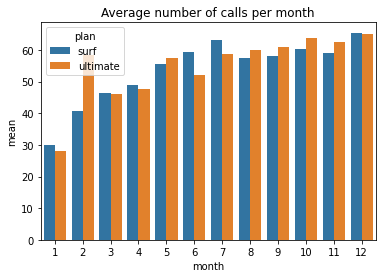

In [58]:
sns.barplot(data=month_user_calls, x="month", y="mean", hue="plan")
plt.title('Average number of calls per month')

This barplot shows that average number of calls is also growing during the year with top values in december(surf and ultimate around 65 calls). Max difference between plans and between neibouring months is and february - Ultimate jumps up to 58! calls in the shortest month of the year!) Why? Cristmas in December, Saint Valentine's day in February, summer holidays may influence a lot.

### Call duration

Group call duration by plan, find the mean and the median:

In [59]:
calls.groupby(['plan'])['duration'].describe().T

plan,surf,ultimate
count,94084.000000,43651.000000
mean,6.767264,6.699939
std,5.844397,5.827914
min,0.000000,0.000000
25%,1.320000,1.230000
50%,6.010000,5.920000
75%,10.710000,10.660000
max,37.600000,36.240000


Average call duration is 6.8-6.7 minutes, the median is lower - nearly 6 min, while upper values are much higher - up to 37.6 min. Mean, median,max values and std for Surf are higher than for Ultimate.

If we consider all calls for the whole observation period, the following histogram shows distribution of calls duration in surf and ultimate users.

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

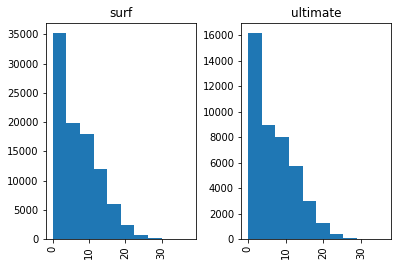

In [60]:
calls.duration.hist(by=calls['plan'])

The shape is almost the same, right-skewed, but the values on y-axis for surf are more than 2 times greater than those for ultimate(no wonder - they are two times more).

Very short calls (less than 1 min) are most frequent and form a special type, that is better shown on the following histogram.

<AxesSubplot:xlabel='duration', ylabel='Count'>

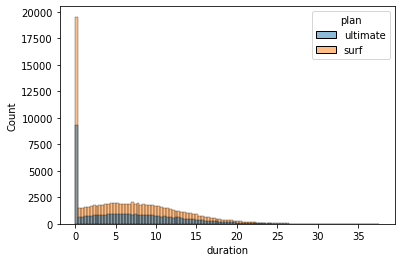

In [61]:
sns.histplot(calls,x='duration',hue='plan')

The most frequent values in both pans are very small - around 0. It's a special category(over 19% calls). 

In [62]:
calls['duration'].value_counts(normalize=True)

0.00     0.194823
8.37     0.000741
4.02     0.000741
3.91     0.000733
7.61     0.000726
           ...   
32.53    0.000007
24.74    0.000007
29.31    0.000007
29.30    0.000007
23.29    0.000007
Name: duration, Length: 2802, dtype: float64

Are there any changes in call duration during the year? We can group values by 2 parameters - plan and month - to investigate it.

In [63]:
# Compare average duration of calls per each plan per each distinct month. Plot a bar plat to visualize
call_dur_month=calls.groupby(['plan','month'])['duration'].agg(['count','sum','mean']).reset_index()
call_dur_month

,plan,month,count,sum,mean
0,surf,1,60,385.68,6.428000
1,surf,2,366,2527.66,6.906175
2,surf,3,1068,7152.31,6.696919
3,surf,4,2444,16619.00,6.799918
4,surf,5,4289,29033.10,6.769200
5,surf,6,5769,39499.26,6.846812
6,surf,7,7642,51367.31,6.721710
7,surf,8,9325,62721.48,6.726164
8,surf,9,11273,75852.46,6.728684
9,surf,10,14303,96149.09,6.722302


Summed call duration per month significantly grows with number of calls which is also growing(as we saw earlier), but the mean and the median don't change so much.

Text(0.5, 1.0, 'Average call duration  per plan over the year')

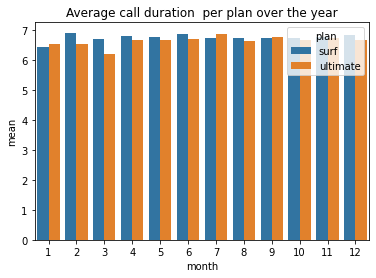

In [64]:
sns.barplot(data=call_dur_month, x="month", y="mean", hue="plan")
plt.title('Average call duration  per plan over the year')

Ultimate users speak more in summer: their longest average calls are in July(6.88), the shortest in March(6.2). Surf users in general speak more than ultimate users(except for July and September), their longest mean calls are in February(6.9) and December(6.8). The biggest diferense between surf and ultimate calls is in March. Why? We may ask Megaline managers.

To compare monthly call duration for plans user_param dataset is needed.


In [65]:
user_param.head(2)

,user_id,month,calls_m,calls_dur_m,messages_m,mb_m,gb_m,plan,revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,70.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,20.0


Text(0.5, 1.0, 'Distribution of monthly call duration per plan')

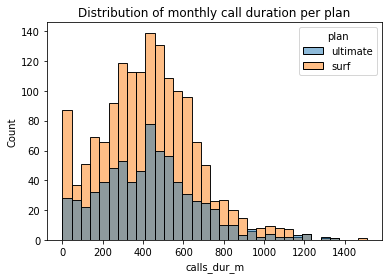

In [66]:
sns.histplot(user_param,x='calls_dur_m',hue='plan')
plt.title('Distribution of monthly call duration per plan')

The distribution of monthly call duration is almost normal for both plans with additional peak on 0 values.
Let's compare  per plan monthly call duration distribution over the year.

Text(0.5, 1.0, 'monthly call duration over the year per plan')

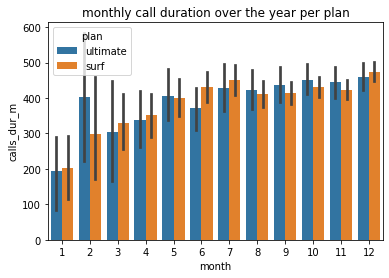

In [67]:
sns.barplot(data=user_param, x="month", y="calls_dur_m", hue="plan")
plt.title('monthly call duration over the year per plan')

Monthly call duration grows over the year,  and again february is somewat special: Surf's call duration jumps, it is much greater than the Ultimate's. It looks like in February Ultimate users call more often(look at number od calls) , but Surf users' calls are longer.

Let's find variance for plans:

In [68]:
user_param.groupby(['plan'])['calls_dur_m'].var()

plan
surf        54968.279461
ultimate    57844.464812
Name: calls_dur_m, dtype: float64

Variance is greater for Ultimate. Let's check the coefficient of variation as the ratio of the standard deviation to the mean:

In [69]:
cv_plan_calls=user_param.groupby(['plan'])['calls_dur_m'].std()/user_param.groupby(['plan'])['calls_dur_m'].mean()
cv_plan_calls

plan
surf        0.546830
ultimate    0.558738
Name: calls_dur_m, dtype: float64

The coefficient of variation is greater for Ultimate users, extent of variability in relation to the mean of the population, so its dispersion is higher. But still for both plans CV is less than 1, so call duration is centered around average.

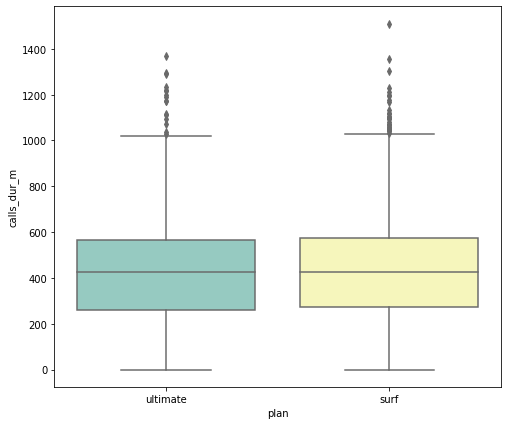

In [70]:
# Plot a boxplot to visualize the distribution of the monthly call duration

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan',y="calls_dur_m",
                 data=user_param, palette="Set3")

The boxplot shows clearly the distributions just described. IQRs and medians are almost equal, outliers go beyond the upper wiskers.

The statistical analysis of calls and other parameters in user_param dataset can be done with the function as follows:

In [71]:
def user_stat(param):
    fig, ax = plt.subplots(figsize=(8,7))
    ax = sns.histplot(user_param, x=param, hue="plan")
    mean=user_param[param].mean()
    std=user_param[param].std()
    var=user_param[param].var()
    cv=std/mean
    plt.show()
    print("Average is",mean)
    print(user_param.groupby(['plan'])[param].mean())
    if cv>1:
        print("Varies a lot")
    else:
        print('Centered around average')

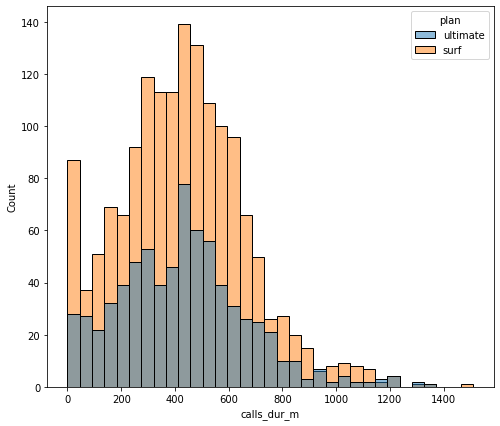

Average is 429.2834714348016
plan
surf        428.749523
ultimate    430.450000
Name: calls_dur_m, dtype: float64
Centered around average


In [72]:
user_stat('calls_dur_m')

**Conclusion**

- Total **Number of calls per month** is increasing from January to December and average number of calls per user per month also grows with top values in december(surf and ultimate around 65 calls). Max difference between plans and between neibouring months is and february - Ultimate jumps up to 58

- **Average call duration per user** is 6.7 min, the median is nearly 6 min, maximum calls last 37.6 min. In both groups the mean is greater than the median, and for surf they are a little bit greater, than for ultimate. The distribution shape on histogram looks very similar,left-skewed, for both plans (but the values on y-axis for surf are more than 2 times greater than those for ultimate), and only surf users speak more than 33 min. The most frequent calls have 0 duration, they are 19% of the data and form a special category in both plans.


- During the year **Summed call duration per month per user** significantly grows (with number of calls),  **average call duration per user** doesn't grow linearly, but varies from month to month. Ultimate users speak more in summer: their longest average calls are in July(6.88), the shortest in March(6.2). Surf users in general speak more than ultimate users(except for July and September), their longest mean calls are in February(6.9). The biggest diferense between surf and ultimate calls is in March.

- **Monthly call duration** has normal distribution for both plans with additional peaks around 0.The mean and the median for Surf are greater than for Ultimate. Maximum values(1278) also belong to Surf users, min are equal(0). Standard deviation and variance are greater for Ultimate.The coefficient of variation is < 1 for both plans (0.69 Surf, 0.73 Ultimate), so both distributions are centered around average.


- **Monthly call duration grows over the year**, and again february is somewat special: Surf's call duration jumps, it is much greater than the Ultimate's. It looks like in February Ultimate users call more often(look at number od calls) , but Surf users' calls are longer.

## Messages

First study individual sms in message dataset.

In [73]:
# Add column with plan values to messages
messages = pd.merge(left = messages , right = user_id_plan, how='left',on=['user_id'])
messages.head()

,id,user_id,message_date,month,plan
0,1000_125,1000,2018-12-27,12,ultimate
1,1000_160,1000,2018-12-31,12,ultimate
2,1000_223,1000,2018-12-31,12,ultimate
3,1000_251,1000,2018-12-27,12,ultimate
4,1000_255,1000,2018-12-26,12,ultimate


Find total number of sms per plan:

In [74]:
messages.plan. value_counts()

surf        49014
ultimate    27037
Name: plan, dtype: int64

In [75]:
messages.plan. value_counts()/len(messages)

surf        0.644489
ultimate    0.355511
Name: plan, dtype: float64

64% of messages are sent by surf users.

Study how number of messages changes over the year.

<AxesSubplot:xlabel='month', ylabel='Count'>

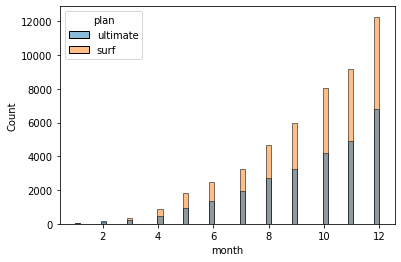

In [76]:
sns.histplot(messages,x='month',hue='plan')


In [77]:
message_month=messages.groupby(['month','plan','user_id'])['id'].agg(['count']).reset_index()
message_month

,month,plan,user_id,count
0,1,surf,1362,21
1,1,ultimate,1077,37
2,1,ultimate,1196,23
3,1,ultimate,1214,2
4,2,surf,1099,3
...,...,...,...,...
1801,12,ultimate,1477,2
1802,12,ultimate,1478,14
1803,12,ultimate,1482,5
1804,12,ultimate,1487,66


Number of sms per month increased very much (we saw increasing number of Megaline clients earlier). How does average number of messages per user change?

In [78]:
month_user_messages=message_month.groupby(['month','plan'])['count'].agg(['sum','mean']).reset_index()
month_user_messages

,month,plan,sum,mean
0,1,surf,21,21.000000
1,1,ultimate,62,20.666667
2,2,surf,108,21.600000
3,2,ultimate,151,25.166667
4,3,surf,351,21.937500
5,3,ultimate,243,34.714286
6,4,surf,870,24.166667
7,4,ultimate,463,28.937500
8,5,surf,1849,33.017857
9,5,ultimate,931,44.333333


So number of sms per month in December it is around 600 times greater for Surf, 100 times greater for Ultimate than it was in January. Average number of messages per user increased from 21(Surf), 20(Ultimate) in January to 48(Surf), 54(Ultimate) in December! Let's plot a graph.


Text(0.5, 1.0, 'Average number of messages per user over the year per plan')

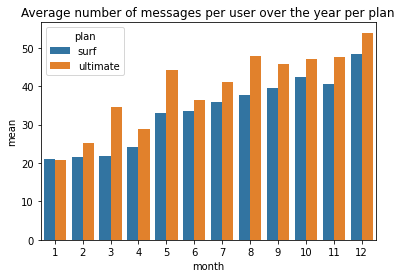

In [79]:
sns.barplot(data=month_user_messages, x="month", y="mean", hue="plan")
plt.title('Average number of messages per user over the year per plan')

The difference between Surf and Ultimate is the biggest in March, May and August. December is the leader in average number of messages per user for both plans. The reason for that can be connected with holidays.

Compare the how **monthly messages** number is distributed among users of each plan. Turn to user_param dataset.

In [80]:
user_param.head(2)

,user_id,month,calls_m,calls_dur_m,messages_m,mb_m,gb_m,plan,revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,70.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,20.0


Text(0.5, 0, 'Monthly messages distribution per plan')

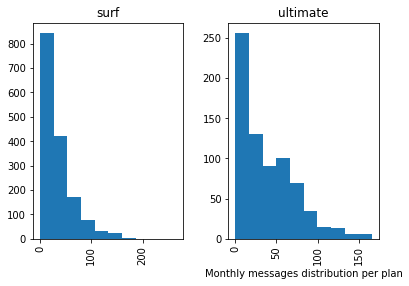

In [81]:
user_param.messages_m.hist(by=user_param['plan'])

plt.xlabel('Monthly messages distribution per plan')

Both plots show similar picture of distribution of monthly messages - it is right-skewed, the most frequent values are around 0. There are upper outliers - above 100 sms per month. The mean shoul be higher than the median. Let's check it with describe method.

In [82]:
user_param.groupby(['plan'])['messages_m'].describe().T

plan,surf,ultimate
count,1573.000000,720.000000
mean,31.159568,37.551389
std,33.566717,34.767179
min,0.000000,0.000000
25%,3.000000,7.000000
50%,24.000000,30.000000
75%,47.000000,61.000000
max,266.000000,166.000000


The mean for Ultimate is greater than for Surf(37.6 VS 31.2), but max number of sms per month send Surf users(266). Standard deviation is also higher for Ultimate(35-34). Let's find CV.

In [83]:
cv_plan_sms=user_param.groupby(['plan'])['messages_m'].std()/user_param.groupby(['plan'])['messages_m'].mean()
cv_plan_sms

plan
surf        1.077252
ultimate    0.925856
Name: messages_m, dtype: float64

Cv for Ultimate(0.9) is less than 1, so its values are centered around average. CV for Surf(1.08) is > 1, so its values vary a lot. Let's sum up statistics with user_stat function:

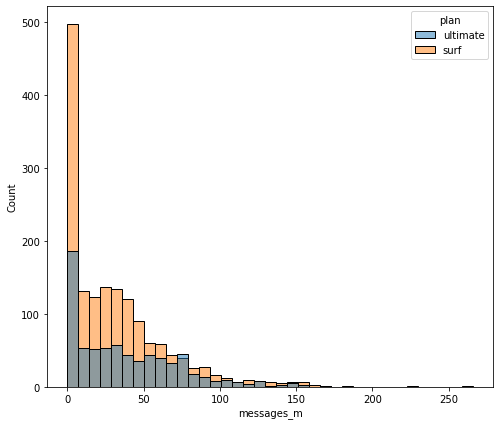

Average is 33.166593981683384
plan
surf        31.159568
ultimate    37.551389
Name: messages_m, dtype: float64
Varies a lot


In [84]:
user_stat('messages_m')

In [85]:
#Share of 0 values is about 22%:
user_param.groupby(['plan'])['messages_m'].value_counts(normalize = True)

plan      messages_m
surf      0.0           0.223140
          11.0          0.019708
          24.0          0.019708
          3.0           0.018436
          4.0           0.017800
                          ...   
ultimate  148.0         0.001389
          151.0         0.001389
          153.0         0.001389
          155.0         0.001389
          166.0         0.001389
Name: messages_m, Length: 270, dtype: float64

Let's illustrate the distribution of monthly messages by boxplot.


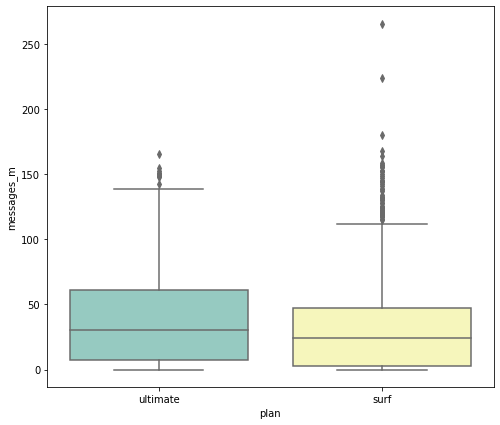

In [86]:
fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan',y="messages_m",
                 data=user_param, palette="Set3")

**Conclusion** 

64% of messages are sent by Surf users, 36% by Ultimate. Total **Number of sms per month** increased very much, in December it is around 600 times greater for Surf, 100 times greater for Ultimate than it was in January. **Average number of messages per user** increased from 21(Surf), 20(Ultimate) in January to 48(Surf), 54(Ultimate).

The distribution of **monthly messages** is right-skewed, the most frequent values are around 0. There are upper outliers - above 100 sms per month. The mean for Ultimate is greater than for Surf(37.6 VS 31.2), but max number of sms per month send Surf users(266), that have many outliers. Standard deviation is also higher for Ultimate(35-34). Cv for Ultimate(0.9) is less than 1, so its values are centered around average. CV for Surf(1.08) is > 1, so its values vary a lot.

## Internet

In [87]:
internet= pd.merge(left = internet , right = user_id_plan, how='left',on=['user_id'])
internet.head(3)

,id,user_id,session_date,mb_used,month,plan
0,1000_13,1000,2018-12-29,89.86,12,ultimate
1,1000_204,1000,2018-12-31,0.00,12,ultimate
2,1000_379,1000,2018-12-28,660.40,12,ultimate


First we analyse individual sessions per plan.

In [88]:
internet.groupby(['plan'])['mb_used'].agg(['count','sum','mean']).reset_index()

,plan,count,sum,mean
0,surf,71586,26046179.93,363.844606
1,ultimate,33239,12394583.78,372.892800


Total number of session and mb_used per session are twice greater for Surf, but average values are greater for Ultimate(373 Vs 364 mb)

array([<AxesSubplot:title={'center':'surf'}>,
       <AxesSubplot:title={'center':'ultimate'}>], dtype=object)

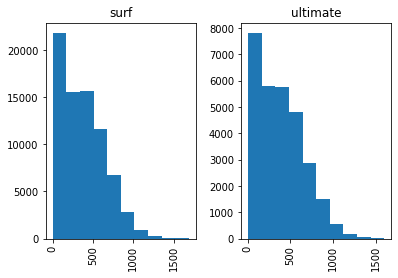

In [89]:
internet.mb_used.hist(by=calls['plan'])

The distribution is right-skewed, its shape is similar for both plans. The most frequent values are around 0, that is better demonstrated by the following graph:

Text(0.5, 1.0, 'Average mb_used per session distribution')

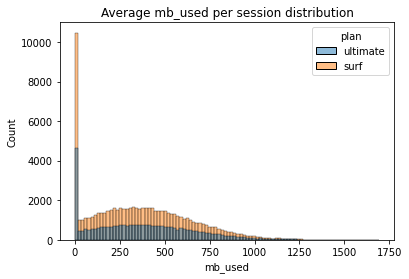

In [90]:
sns.histplot(internet,x='mb_used',hue='plan')
plt.title('Average mb_used per session distribution')

Find the share of 0 values for mb_used per session:

In [91]:
mb_share=internet.groupby(['plan'])['mb_used'].value_counts(normalize=True)
mb_share

plan      mb_used
surf      0.00       0.132805
          55.74      0.000084
          85.56      0.000084
          262.13     0.000084
          295.25     0.000084
                       ...   
ultimate  1546.57    0.000030
          1550.54    0.000030
          1573.07    0.000030
          1585.21    0.000030
          1668.03    0.000030
Name: mb_used, Length: 69600, dtype: float64

So 13 % of users do not use internet at all, they form a special category.
Let's look at the dynamics through the year.

In [92]:
internet.groupby(['plan'])['mb_used'].describe().T

plan,surf,ultimate
count,71586.000000,33239.000000
mean,363.844606,372.892800
std,276.029257,279.516856
min,0.000000,0.000000
25%,133.242500,142.740000
50%,340.640000,350.700000
75%,551.175000,562.040000
max,1693.470000,1668.030000


Mean, median, std values of internet session for Ultimate users are greater, but not very much. Max values are greater for Surf(outliers).

Let's see dynamics over the year.

In [93]:
internet_month=internet.groupby(['plan','month'])['mb_used'].agg(['sum','mean']).reset_index()
internet_month

,plan,month,sum,mean
0,surf,1,9749.72,324.990667
1,surf,2,109609.59,355.875292
2,surf,3,306945.12,374.780366
3,surf,4,599210.15,360.752649
4,surf,5,1073099.33,359.136322
5,surf,6,1484248.33,357.391844
6,surf,7,2030815.67,369.172091
7,surf,8,2720843.68,370.889269
8,surf,9,3218737.67,364.440406
9,surf,10,4102786.41,365.471799


Internet usage in mb increases sharply over the year, average values also grow. Let's plot barplot to compare Surf and Ultimate users.

Text(0.5, 1.0, 'internet traffic per month dynamics over the year')

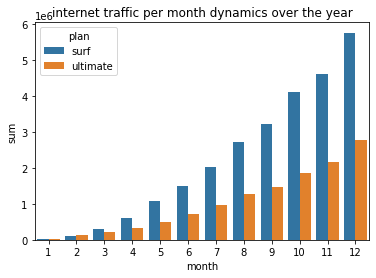

In [94]:
sns.barplot(data=internet_month, x="month", y="sum", hue="plan")
plt.title('internet traffic per month dynamics over the year')

Text(0.5, 1.0, 'average mb_session  per plan over the year')

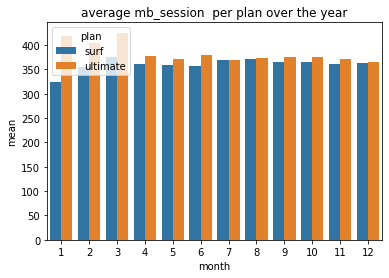

In [95]:
sns.barplot(data=internet_month, x="month", y="mean", hue="plan")
plt.title('average mb_session  per plan over the year')

These barplots show that while internet usage in mb increases sharply over the year, average number of mb per session does not grow so much. In first 3 months of the year average mb_session for Surf grows significantly(up to 375mb in March), then goes down and doesn't change much. Ultimate users have max average values of mb_session in March(425), January, February, but since April there are also only small changes.

Now let's take user_param dataset and analyse monthly call duration per users of Surf and Ultimate plan.

In [96]:
user_param.groupby(['plan'])['mb_m'].describe().T

plan,surf,ultimate
count,1573.000000,720.000000
mean,16558.283490,17214.699694
std,8013.513327,7851.897435
min,0.000000,0.000000
25%,11986.520000,12666.955000
50%,16829.310000,16858.340000
75%,20999.610000,21014.527500
max,70931.590000,46595.330000


In [97]:
cv_plan_mb=user_param.groupby(['plan'])['mb_m'].std()/user_param.groupby(['plan'])['mb_m'].mean()
cv_plan_mb

plan
surf        0.483958
ultimate    0.456116
Name: mb_m, dtype: float64

Meadian values are almost equal, but for Surf the mean is lower, std greater std greater, than for Ultimate (16560 VS 17215,  8014 VS 7852), both CVs are less than 1. The mean and the median don't differ much, so we would expect normal distribution. Let's check it and apply user_stat function:

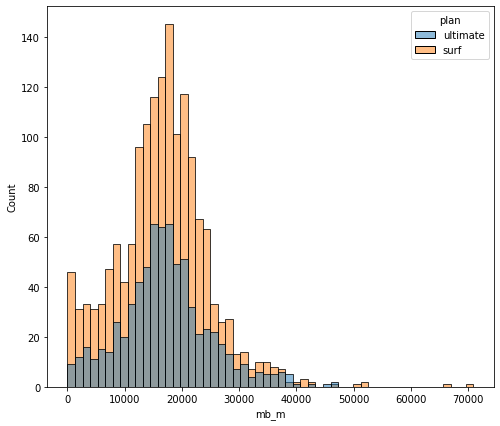

Average is 16764.39760575665
plan
surf        16558.283490
ultimate    17214.699694
Name: mb_m, dtype: float64
Centered around average


In [98]:
user_stat('mb_m')

We see normal distribution with upper outliers which are clearly determined on boxplot:

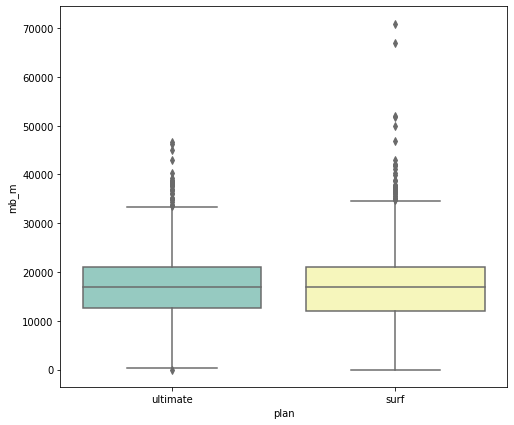

In [99]:
# Plot a boxplot to visualize the distribution of the monthly call duration

fig, ax = plt.subplots(figsize=(8,7))
ax = sns.boxplot( x='plan',y="mb_m",
                 data=user_param, palette="Set3")

**Conclusion** 

Considering individual sessions: 
 - Total **number of sessions** and mb_used are twice greater for Surf. **Average mb_used per session** for Ultimate clients are greater than for Surf(373 Vs 364mb), its distribution is right-skewed with similar shape for both plans. The most frequent values are around 0 - 13 % of users do not use internet at all, they form a special category.

- **Internet traffic per month** increased sharply over the year for both plans, but **average mb_used per session** do not grow so much. In the first 3 months of the year average mb_session for Surf grows significantly(up to 375mb in March), then goes down and doesn't change much. Ultimate users have max average values of mb_session in March(425), January, February, but since April there are also only small changes.

Considering monthly aggregated data:
- **Monthly internet** is distributed normally. Meadian values are almost equal for both plans, but for Surf the mean is lower, std greater std greater, than for Ultimate (16560 VS 17215,  8014 VS 7852), both CVs are less than 1,so values are centered around average. 

## Revenue

The only dataset with revenue values is user_param.

In [100]:
user_param.head(2)

,user_id,month,calls_m,calls_dur_m,messages_m,mb_m,gb_m,plan,revenue
0,1000,12,16.0,124.0,11.0,1901.47,2.0,ultimate,70.0
1,1001,8,27.0,182.0,30.0,6919.15,7.0,surf,20.0


Begin with describe method to get the main statistics:

In [101]:
user_param.groupby(['plan']).revenue.describe().T

plan,surf,ultimate
count,1573.000000,720.000000
mean,60.706408,72.313889
std,55.388042,11.395108
min,20.000000,70.000000
25%,20.000000,70.000000
50%,40.360000,70.000000
75%,80.360000,70.000000
max,590.370000,182.000000


Average revenue for Surf is less than for Ultimate(61 VS 72).
Min revenues are equal to monthly charge which for Surf is less than for Ultimate(20 VS 70).
But QR1, QR2 and QR3 for Ultimate are also 70: the majority of users do not go beyond limites for plan, only  some outliers overuse it and pay up to 196$.  QR1 equals min for Surf, the median is less than the mean(40 VS 61), and max values are 3 times higher than max for Ultimate. Standard deviation for Surf is 5 times greater than for Ultimate.
Let's plot histogtams.

Text(0.5, 0, 'Monthly revenue per user per plan')

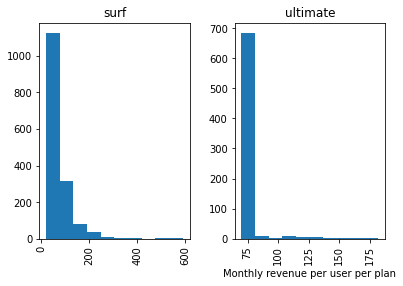

In [102]:
user_param.revenue.hist(by=user_param['plan'])

plt.xlabel('Monthly revenue per user per plan')

The shapes are similar, but the scale is different. Let's look at the distributions together on one plot.

Text(0.5, 1.0, 'Distribution of revenue per user per plan')

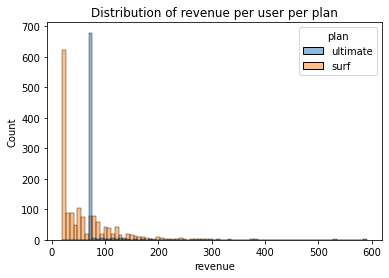

In [103]:
sns.histplot(user_param,x='revenue',hue='plan')
plt.title('Distribution of revenue per user per plan')

We clearly see  the difference: revenue values for Ultimate do not vary so much. Let's find variance and coefficient of variation:

In [104]:
user_param.groupby(['plan'])['revenue'].var()

plan
surf        3067.835152
ultimate     129.848486
Name: revenue, dtype: float64

In [105]:
cv_plan_rev=user_param.groupby(['plan'])['revenue'].std()/user_param.groupby(['plan'])['revenue'].mean()
cv_plan_rev

plan
surf        0.912392
ultimate    0.157578
Name: revenue, dtype: float64

For both plans CV <1, values are centered around average, but for Surf CV is almost 6 times greater than for Ultimate.

Let's compare boxplots for Surf and Ultimate:

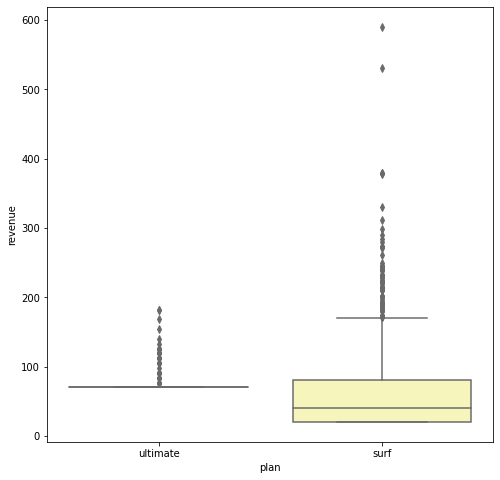

In [106]:
# Plot a boxplot to visualize the distribution of the monthly call duration

fig, ax = plt.subplots(figsize=(8,8))
ax = sns.boxplot( x='plan',y="revenue",
                 data=user_param, palette="Set3")

Ultimate has a line instead of box and some upper outliers(min=QR1=QR2=QR3), while Surf has a box, a whisker and many outliers. 

Let's find total revenue Megaline got in 2018 from Surf and Ultimate users:

In [107]:
user_param.groupby(['plan'])['revenue'].sum()

plan
surf        95491.18
ultimate    52066.00
Name: revenue, dtype: float64

So, though mean revenue from Surf user is less than from Ultimate user, Surf is more popular plan and it brought Megaline more revenue(95491 VS 52066)!

**Conclusions**

- Min values for Surf and Ultimate are equal to monthly charge(20 VS 70). 
- For Ultimate users QR1, QR2 and QR3  are also 70 because the majority of users do not go beyond limites for plan. Number of outliers is not so big max revenue for Ultimate is 182$. 
- For Surf users QR1 equals min for Surf, the median is less than the mean(40 VS 61), and max values(590) are 3 times higher than max for Ultimate. 
- Standard deviation for Surf is 5 times greater than for Ultimate.
- For both plans **CV <1, values are centered around average, but for Surf CV is almost 6 times greater than for Ultimate.

- The distribution on histogram is right-skewed for both plans, but for Ultimate it is much narrower and on boxplot there's just a line and outliers, because revenue values for Ultimate do not vary so much.
- Total revenue in 2018 from Surf users is 95491 , from Ultimate users 52055, so Surf brought Megalime more revenue.

# Test statistical hypotheses

We should test the hypothesis that the average revenue from users of Ultimate and Surf calling plans differs.
H0: average revenue from users of Ultimate equals average revenue from users of Surf(there is no differense in user's behavior of Ultimate and Surf clients)
H1: average revenue from users of Ultimate and Surf is not equal( the difference is significant and it can not be random)
 choose the statistical test, decide on the alpha value.]

First we form new tables with columns needed for hypothesis testing.

In [108]:
sample=user_param[['user_id', 'revenue','plan']]
sample

,user_id,revenue,plan
0,1000,70.00,ultimate
1,1001,20.00,surf
2,1001,20.00,surf
3,1001,90.09,surf
4,1001,60.00,surf
...,...,...,...
2288,1349,20.33,surf
2289,1361,20.00,surf
2290,1482,70.00,ultimate
2291,1108,70.00,ultimate


In [109]:
city=users[['user_id','city']]
city

,user_id,city
0,1000,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,"Seattle-Tacoma-Bellevue, WA MSA"
2,1002,"Las Vegas-Henderson-Paradise, NV MSA"
3,1003,"Tulsa, OK MSA"
4,1004,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...
495,1495,"New York-Newark-Jersey City, NY-NJ-PA MSA"
496,1496,"New Orleans-Metairie, LA MSA"
497,1497,"Los Angeles-Long Beach-Anaheim, CA MSA"
498,1498,"New York-Newark-Jersey City, NY-NJ-PA MSA"


To add information about city to sample dataset let's merge tables.

In [110]:
sample=pd.merge(left = sample , right = city, how='left',on=['user_id'])
sample.head()

,user_id,revenue,plan,city
0,1000,70.00,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,20.00,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,20.00,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,90.09,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,60.00,surf,"Seattle-Tacoma-Bellevue, WA MSA"


Let's form samples  with revenue values for surf and ultimate users.

In [111]:
surf=sample.query('plan=="surf"').revenue
surf

1        20.00
2        20.00
3        90.09
4        60.00
5        60.00
         ...  
2282    180.18
2286     20.78
2287     40.66
2288     20.33
2289     20.00
Name: revenue, Length: 1573, dtype: float64

In [112]:
ultimate=sample.query('plan=="ultimate"').revenue
ultimate

0        70.0
19       70.0
20       84.0
26       70.0
27       70.0
        ...  
2284    112.0
2285     70.0
2290     70.0
2291     70.0
2292     70.0
Name: revenue, Length: 720, dtype: float64

Samples surf and ultimate are big enough, we may use statistical metod to compare compare their means. 
In order to test the hypothesis that the means of two statistical populations are equal based on samples taken from them, we apply the method scipy.stats.ttest_ind(). 
Let's set alpha = 0.05  - it's a critical statistical significance level:
if the p-value is less than alpha, we reject the hypothesis

In [113]:
p_value=stats.ttest_ind(surf, ultimate,equal_var = False).pvalue
p_value

3.17039054811355e-15

In [114]:
p_value=stats.ttest_ind(surf, ultimate,equal_var = True).pvalue
p_value

2.862674510698644e-08

Method stats.ttest_ind(surf, ultimate) requires the third argument equal_var = True(if variances of samples 1 and 2 are equal) or equal_var = False(if variances are different). To find out it we use the Levene test, that tests the null hypothesis that all input samples are from populations with equal variances. Lets define function that will make t_test for 2 samples after estimating equal_var parameter.

In [115]:

# Test the hypotheses
def t_test(sample1,sample2,alpha=0.05):
    p_value_levene=stats.levene(sample1, sample2).pvalue
    if p_value_levene<alpha:
        option_var=False
    else:
        option_var=True
    p_value=stats.ttest_ind(sample1, sample2,nan_policy='omit',equal_var=option_var).pvalue
    if p_value<alpha:
        print('Reject H0: average of sample 1 is not equal to average of sample 2')
    else:
        print( "Fail to Reject H0: We don't have enough evidence to say that averages of sample 1 \
  and sample 2 are not the same")


In [116]:
t_test(surf, ultimate)

Reject H0: average of sample 1 is not equal to average of sample 2


P_value very much smaller than alpha, so we have to reject the null-hypothesis that average of surf sample is equal to average of ultimate sample.

**The differance between the average revenue from users of Surf and Ultimate plans is statistically proven**.

Now let's test the hypothesis that the average revenue from users in the NY-NJ area is different from that of the users from the other regions.

**H0**: average revenue from users in the NY-NJ area equals to average revenue from  users from the other regions.

**H1**:average revenue from users in the NY-NJ area is not equal to average revenue from  users from the other regions.

**alpha=0.05**, 
test: **stats.ttest_ind** based on **Levine** test for variance.  We may use t_test function, but first let's define the samples.

In [117]:
sample.city.nunique()

73

In [118]:
NY_NJ=sample.query('city == "New York-Newark-Jersey City, NY-NJ-PA MSA"').revenue
NY_NJ

56       20.00
57       38.84
75       20.00
76      100.00
77       20.00
         ...  
2260    120.42
2261    170.27
2262    200.00
2263    110.33
2290     70.00
Name: revenue, Length: 377, dtype: float64

In [119]:
#REVIEWER CODE

#NY_NJ =  sample[sample['city'].str.contains('NY-NJ')].revenue

In [120]:
# ok, let's try reviewer's version
NY_NJ_ =  sample[sample['city'].str.contains('NY-NJ')].revenue
NY_NJ_

56       20.00
57       38.84
75       20.00
76      100.00
77       20.00
         ...  
2260    120.42
2261    170.27
2262    200.00
2263    110.33
2290     70.00
Name: revenue, Length: 377, dtype: float64

In [121]:
NY_NJ.describe()

count    377.000000
mean      59.921353
std       43.537865
min       20.000000
25%       20.000000
50%       51.770000
75%       72.460000
max      280.000000
Name: revenue, dtype: float64

In [122]:
other_city=sample.query('city != "New York-Newark-Jersey City, NY-NJ-PA MSA"').revenue
other_city

0       70.00
1       20.00
2       20.00
3       90.09
4       60.00
        ...  
2287    40.66
2288    20.33
2289    20.00
2291    70.00
2292    70.00
Name: revenue, Length: 1916, dtype: float64

In [123]:
#one more way
other_city_=sample[~sample['city'].str.contains('NY-NJ')].revenue
other_city_

0       70.00
1       20.00
2       20.00
3       90.09
4       60.00
        ...  
2287    40.66
2288    20.33
2289    20.00
2291    70.00
2292    70.00
Name: revenue, Length: 1916, dtype: float64

In [124]:
other_city.describe()

count    1916.000000
mean       65.222771
std        47.170414
min        20.000000
25%        24.927500
50%        70.000000
75%        70.000000
max       590.370000
Name: revenue, dtype: float64

Samples are ready, their medians are almost the same, mean values differ, but such differance can be random.  Let's apply ttest function

In [125]:
t_test(NY_NJ, other_city)

Reject H0: average of sample 1 is not equal to average of sample 2


In [126]:
stats.ttest_ind(NY_NJ, other_city, equal_var = False).pvalue

0.03352561588530014

In [127]:
#test new version samples
t_test(NY_NJ_, other_city_)

Reject H0: average of sample 1 is not equal to average of sample 2


In [128]:
stats.ttest_ind(NY_NJ_, other_city_, equal_var = False).pvalue

0.03352561588530014

**Again the null hypothesis should be rejected, so average revenues from users in the NY-NJ area and in other regions are different, the difference is significant.**

**Conclusion**


We tested 2 hypotheses:
- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in the NY-NJ area is different from that of the users from the other regions.
In both cases null hypothesis was rejected.  The differance between the average revenue from users of Surf and Ultimate plans is significant and it can not be random. The difference between average revenues from users in the NY-NJ area and in other regions is significant too.


## General conclusion



We had information on 500 Megaline clients in 5 datasets: Plan, Users, Calls, Messages, Internet. 
The data was **prepared**:
- missing values in churn_date column were filled with 2018-12-31,
- dates in all datasets were changed to datetime format,
- observation time was calculated in days and months and two columns for these values were added,
- column for month of calls, messages and internet sessions, gigabytes for internet were added,
- two rows in Users dataset for clients that had just registered and didn't really use their plan were deleted.
No duplicates found.


Data per user was **aggregated** in user_param dataset, average monthly values for calls, messages, internet and monthly revenue was calculated. **EDA and statistical analysis** was carried out to study core parameters to describe user's behavior for Surf and Ultimate plans.Histograms, barplots and boxplots were plotted.

The analysis demonstrated that Surf and Ultimate users have **much in common**:
- number of clients grows over the year
- total number of calls, call duration, number of messages and internet sessions, internet  traffic per month is sharply growing over the year
- the most frequent values for calls(19%), messages(23%) and internet(13%) is 0, so significant share of 0-clients form a special category.
- average number of calls per user and average number of messages per user increase over the year. 
- average number of calls per user has max values in december.
 -average call duration per user doesn't grow linearly and average mb_used per session do not grow so much.
- the distributions of average call duration, monthly messages and average mb_used per session have similar shape - right-skewed, so mean is greater than the median. 
- monthly call duration has normal distribution for both plans.The coefficient of variation is < 1 for both plans, so both distributions are centered around average.
- The distribution of monthly messages is right-skewed with m
- monthly internet is distributed normally:the mean and the median are almost equal. Both CVs are less than 1, so values are centered around average.

**Differense between Surf and Ultimate plans**:
- number of Surf users in our dataset is 2 times greater than number of Ultimate clients. Given that our dataset is representative sample of the whole population of Megaline clients, we may say that Surf plan is twice popular.
- share of calls, messages sent, total number of sessions and mb_used are twice greater for Surf,than that of Ultimate clients.
- while shape of distribution of average call duration, messages and internet is similar, the scale is different: values on y-axis are usually 2 times greater than on plots for Ultimate plan.
- Max difference between plans in average number of calls per user is in february - Ultimate users call more often than Surf users.
- Judjing by average call duration per user Ultimate users speak more in summer: their longest average calls are in July(6.88), the shortest in March(6.2). Surf users in general speak more than ultimate users(except for July and September), their longest mean calls are in February(6.9) median in March(6.17) and April(6.2). The biggest diferense between surf and ultimate calls is in March.
- Mean and median of monthly call duration for Surf are much greater than for Ultimate. Maximum values(1278) also belong to Surf users, min are equal(0). Standard deviation and variance are also greater for Surf.The coefficient of variation is < 1 for both plans (0.69 Surf, 0.73 Ultimate), so both distributions are centered around average.
- Average number of monthly messages for Ultimate is greater than for Surf(31.5 VS 27.7), but max number of sms per month send Surf users(266). Standard deviation is also higher for Ultimate(35-34). Cv for Ultimate(0.9) is less than 1, so its values are centered around average. CV for Surf(1.08) is > 1, so its values vary a lot.
- Average mb_used per session** for Ultimate clients are greater than for Surf(373 Vs 364mb). xIn the first 3 months of the year average mb_session for Surf grows significantly(up to 375mb in March), then goes down and doesn't change much. Ultimate users have max average values of mb_session in March(425), January, February, but since April there are also only small changes.
-The mean and std of monthly internet for Surf is greater than for Ultimate(14 VS 13.6, 8.28 VS 8.08), max values for monthly internet(73mb) belong to Surf users.


 The distribution shape on histogram looks very similar,left-skewed, for both plans (but the values on y-axis for surf are more than 2 times greater than those for ultimate), and only surf users speak more than 33 min. The most frequent calls have 0 duration, they are 19% of the data and form a special category in both plans.
During the year Summed call duration per month per user significantly grows (with number of calls), average call duration per user doesn't grow linearly, but varies from month to month. Ultimate users speak more in summer: their longest average calls are in July(6.88), the shortest in March(6.2). Surf users in general speak more than ultimate users(except for July and September), their longest mean calls are in February(6.9). The biggest diferense between surf and ultimate calls is in March.
Monthly call duration has normal distribution for both plans with additional peaks around 0.The mean and the median for Surf are greater than for Ultimate. Maximum values(1278) also belong to Surf users, min are equal(0). Standard deviation and variance are greater for Ultimate.The coefficient of variation is < 1 for both plans (0.69 Surf, 0.73 Ultimate), so both distributions are centered around average.
Monthly call duration grows over the year, and again february is somewat special: Surf's call duration jumps, it is much greater than the Ultimate's. It looks like in February Ultimate users call more often(look at number od calls) , but Surf users' calls are longer.

Considering monthly aggregated data:
- **Monthly internet** is distributed normally. Meadian values are almost equal for both plans, but for Surf the mean is lower, std greater std greater, than for Ultimate (16560 VS 17215,  8014 VS 7852), both CVs are less than 1,so values are centered around average. 

- Min values for Surf and Ultimate are equal to monthly charge(20 VS 70). 
- For Ultimate users QR1, QR2 and QR3  are also 70 because the majority of users do not go beyond limites for plan. Number of outliers is not so big max revenue for Ultimate is 182$. 
- For Surf users QR1 equals min for Surf, the median is less than the mean(40 VS 61), and max values(590) are 3 times higher than max for Ultimate. 
- Standard deviation for Surf is 5 times greater than for Ultimate.
- For both plans **CV <1, values are centered around average, but for Surf CV is almost 6 times greater than for Ultimate.

- The distribution on histogram is right-skewed for both plans, but for Ultimate it is much narrower and on boxplot there's just a line and outliers, because revenue values for Ultimate do not vary so much.
- Total revenue in 2018 from Surf users is 16407, from Ultimate users 11494, so Surf brought Megalime more revenue.

**Monthly revenue** was analysed for both plans, big differances are found:
- Min values for Surf and Ultimate are equal to monthly charge(20 VS 70). 
- For Ultimate users QR1, QR2 and QR3  are also 70 because the majority of users do not go beyond limits for plan. Number of outliers is not so big, max revenue for Ultimate is 196$. 
- For Surf users QR1 equals min for Surf, but QR2(median) is a little higher(20,1), the mean is more than twice as high(49), and max values(623) are 3 times higher than max for Ultimate. 
- Standard deviation for Surf is 5 times greater than for Ultimate.
- For Ultimate **CV** <1, values are centered around average, but for Surf CV>1, so data are not centered.
- The distribution on histogram is right-skewed for both plans, but for Ultimate it is much narrower and on boxplot there's just a line and outliers, because revenue values for Ultimate do not vary so much.
- Total revenue in 2018 from Surf users is 95491 , from Ultimate users 52055, so Surf brought Megalime more revenue.

**Two hypotheses were statistically tested**:
- The average revenue from users of Ultimate and Surf calling plans differs.
- The average revenue from users in the NY-NJ area is different from that of the users from the other regions.
Samples were  prepared, method scipy.stats.ttest_ind() was applied.Statistical significance level alpha was set to 0.05, Levene test checking variance equality was used. 
In both cases null hypothesis was rejected. 
The differance between the average revenue from users of Surf and Ultimate plans is significant and it can not be random. The difference between average revenues from users in the NY-NJ area and in other regions is significant too.
